In [17]:
%reload_kedro

[10/20/23 17:15:16] INFO     Resolved project path as: /home/jamontanac/Documents/Procesamiento     ]8;id=868941;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=388131;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/ipython/__init__.py#139\139]8;;\
                             Imagenes y video/Fighting-Illutions.                                                  
                             To set a different path, run '%reload_kedro <project_root>'                           

[10/20/23 17:15:16] WARNING  /home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site ]8;id=912061;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/warnings.py\warnings.py]8;;\:]8;id=548750;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/warnings.py#109\109]8;;\
                             -packages/kedro/framework/project/__init__.py:359: UserWarning: An                    
                             error occurred while importing the                                                    
                             'Fighting-Illutions.pipelines.generate_adversarial_examples' module.                  
                             Nothing defined therein will be returned by 'find_pipelines'.                         
                                                                                                                   
                             Traceback (most recent call last):                                                    
                               File                                                                                
                             "/home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/sit                
                             e-packages/kedro/framework/project/__init__.py", line 357, in                         
                             find_pipelines                                                                        
                                 pipeline_module = importlib.import_module(pipeline_module_name)                   
                               File                                                                                
                             "/home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/imp                
                             ortlib/__init__.py", line 126, in import_module                                       
                                 return _bootstrap._gcd_import(name[level:], package, level)                       
                               File "<frozen importlib._bootstrap>", line 1050, in _gcd_import                     
                               File "<frozen importlib._bootstrap>", line 1027, in _find_and_load                  
                               File "<frozen importlib._bootstrap>", line 1006, in                                 
                             _find_and_load_unlocked                                                               
                               File "<frozen importlib._bootstrap>", line 688, in _load_unlocked                   
                               File "<frozen importlib._bootstrap_external>", line 883, in                         
                             exec_module                                                                           
                               File "<frozen importlib._bootstrap>", line 241, in                                  
                             _call_with_frames_removed                                                             
                               File "/home/jamontanac/Documents/Procesamiento Imagenes y                           
                             video/Fighting-Illutions/src/Fighting-Illutions/pipelines/generate_adv                
                             ersarial_examples/__init__.py", line 6, in <module>                                   
                                 from .pipeline import create_pipeline                                             
                               File "/home/jamontanac/Documents/Procesamiento Imagenes y                           
                             video/Fighting-Illutions/src/Fighting-Illutions/pipelines/generate_adv                
                             ersarial_examples/pipeline.py", line 14, in <module>                                  
                                 parameters = conf_loader["parameters"

[10/20/23 17:15:17] INFO     Kedro project Fighting Illutions                                       ]8;id=170798;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=862600;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/ipython/__init__.py#108\108]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=791914;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=602751;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/ipython/__init__.py#109\109]8;;\
                             'pipelines'                                                                           

                    INFO     Registered line magic 'run_viz'                                        ]8;id=518201;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=808149;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/ipython/__init__.py#115\115]8;;\

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import itertools as it
from sklearn.metrics import confusion_matrix
import torch
import torchvision
import torchvision.transforms as transforms
import cv2
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision.transforms import Compose


In [3]:

def Create_data_loader(batch_size=128)-> torch.utils.data.DataLoader:

    transform_test = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
    ])

    testset = torchvision.datasets.CIFAR10(
        root='./data/01_raw', train=False, download=True, transform=transform_test)
    testloader = torch.utils.data.DataLoader(
        testset, batch_size=batch_size, shuffle=False, num_workers=2)
    return testloader


def resize_pad(image, ratio=0.8):
    """
    Resizes and pads an image with zeros to match the original size.

    Args:
        image (numpy.ndarray): The input image to resize and pad.
        ratio (float): The ratio to resize the image by (default 0.8).

    Returns:
        torch.Tensor: The resized and padded image.
    """
    original = image.numpy().transpose((1, 2, 0))
    old_size = original.shape[:2]
    new_size = int(old_size[0] * ratio)
    img = cv2.resize(original, (new_size, new_size))
    max_y = old_size[0] - new_size
    max_x = old_size[1] - new_size
    start_y = np.random.randint(0, max_y)
    start_x = np.random.randint(0, max_x)
    pad = np.zeros_like(original)
    pad[start_y:start_y + new_size, start_x:start_x + new_size] = img
    pad = cv2.flip(pad, 1)
    return torch.from_numpy(pad.transpose((2, 0, 1))).float()

def random_distortion(h, w, d, delta):
    """
    Returns distorted coordinates
    """
    nw = w // d
    nh = h // d
    distorted_coords = torch.zeros(nh+1, nw+1, 2)
    
    for m in range(nw+1):
        for n in range(nh+1):
            dx = (torch.rand(1) * 2 - 1) * delta  
            dy = (torch.rand(1) * 2 - 1) * delta 
            x = m * d + dx
            y = n * d + dy
            distorted_coords[n, m, 0] = x
            distorted_coords[n, m, 1] = y
            
    return distorted_coords


def image_distortion(img, d=4, delta=0.5):
    """
    Apply distortion to a given image.
    img: a tensor of shape (C, H, W)
    d: size of the grid
    delta: distortion limit
    """
    C, H, W = img.shape
    nw = W // d
    nh = H // d
    distorted_coords = random_distortion(H, W, d, delta)
    distorted_image = torch.zeros_like(img)
    
    for m in range(nw+1):
        for n in range(nh+1):
            src_x = m * d
            src_y = n * d
            dest_x = int(distorted_coords[n, m, 0].item())
            dest_y = int(distorted_coords[n, m, 1].item())
            for i in range(d+1):
                for j in range(d+1):
                    if src_y + j < H and src_x + i < W and dest_y + j < H and dest_x + i < W:
                        distorted_image[:, dest_y + j, dest_x + i] = img[:, src_y + j, src_x + i]
                        
    return distorted_image



class AdversarialDataset(Dataset):
    def __init__(self, data_dict, transform=None):
        """
        Args:
            data_dict (dict): Dictionary containing adversarial data.
            transform (callable, optional): Optional transform to be applied on the examples.
        """
        self.data_dict = data_dict
        self.transform = transform

    def __len__(self):
        return len(self.data_dict["real_labels"])

    def __getitem__(self, idx):
        sample = {key: value[idx] for key, value in self.data_dict.items()}
        if self.transform:
            sample["examples"] = self.transform(sample["examples"])
        return sample
class ResizePadTransform:
    def __init__(self, ratio=0.8):
        self.ratio = ratio

    def __call__(self, image):
        return resize_pad(image, ratio=self.ratio)
class DistortTransform:
    def __init__(self, d=4, delta=0.5):
        self.d = d
        self.delta = delta
        
    def __call__(self, img):
        return image_distortion(img, self.d, self.delta)

def init_model(model:torch.nn.Module)->torch.nn.Module:
    # Move model to GPU if available
    model = model.to(device)
    if device == 'cuda':
        model= torch.nn.DataParallel(model)
        cudnn.benchmark = True
    return model

In [4]:

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
attacks = ["DeepFool", "CarliniL2", "FSGM", "PGD"]
models = ['Resnet_model','Regnet_x_model','Regnet_y_model']
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for model_ref in models:
    model = catalog.load(f"{model_ref}")
    for attack in attacks:
        adver = catalog.load(f'{model_ref}_Adversarial_{attack}@Dataset')
        # Create the dataset
        transform_fn = ResizePadTransform(ratio=0.9)
        # transform_fn = DistortTransform(d=4, delta=0.5)
        
        dataset = AdversarialDataset(adver, transform=transform_fn)
        # Create the DataLoader
        batch_size = 512  # or any other desired batch size
        dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
        model_classifier= init_model(model)
        model_classifier.eval()# we ran only inference for tested data
        correct_defense = 0
        correct_model = 0
        correct_adversarial = 0
        total = 0
        confidence_defense = []
        for batch in dataloader:
            # Assuming model is your pre-trained model
            images, real_labels  = batch["examples"], batch["real_labels"]
            model_labels, adversarial_labels = batch["model_labels"], batch["adversarial_labels"]
            images, real_labels = images.to(device), real_labels.to(device)
            model_labels, adversarial_labels =model_labels.to(device), adversarial_labels.to(device)
            with torch.no_grad():
                outputs = model_classifier(images)
                _, predicted= torch.max(outputs.data, 1)
                confidence_defense.extend(F.softmax(outputs, dim=1).max(dim=1)[0].cpu().numpy())
                total += real_labels.size(0)
                correct_defense += (predicted == real_labels).sum().item()
                correct_model += (model_labels == real_labels).sum().item()
                correct_adversarial += (adversarial_labels == real_labels).sum().item()
        original_accuracy = correct_model *100 /total
        adversarial_accuracy = correct_adversarial *100 /total
        defense_accuracy = correct_defense *100 /total
        # acc = 100*correct/total
        print(original_accuracy, adversarial_accuracy, defense_accuracy)


[10/24/23 21:48:20] INFO     Loading data from 'Resnet_model' (PytorchDatasetModel)...          ]8;id=586719;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=348145;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py#492\492]8;;\

                    INFO     Loading data from 'Resnet_model_Adversarial_DeepFool@Dataset'      ]8;id=176495;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=634480;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py#492\492]8;;\
                             (PytorchDatasetDict)...                                                               

83.99 9.71 26.77


[10/24/23 21:48:21] INFO     Loading data from 'Resnet_model_Adversarial_CarliniL2@Dataset'     ]8;id=849285;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=690297;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py#492\492]8;;\
                             (PytorchDatasetDict)...                                                               

83.99 61.33 27.53


[10/24/23 21:48:22] INFO     Loading data from 'Resnet_model_Adversarial_FSGM@Dataset'          ]8;id=461765;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=133682;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py#492\492]8;;\
                             (PytorchDatasetDict)...                                                               

83.99 67.66 27.25


                    INFO     Loading data from 'Resnet_model_Adversarial_PGD@Dataset'           ]8;id=949564;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=840341;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py#492\492]8;;\
                             (PytorchDatasetDict)...                                                               

83.99 70.22 27.29


[10/24/23 21:48:23] INFO     Loading data from 'Regnet_x_model' (PytorchDatasetModel)...        ]8;id=548119;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=220138;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py#492\492]8;;\

                    INFO     Loading data from 'Regnet_x_model_Adversarial_DeepFool@Dataset'    ]8;id=733518;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=935982;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py#492\492]8;;\
                             (PytorchDatasetDict)...                                                               

80.98 12.42 24.34


[10/24/23 21:48:24] INFO     Loading data from 'Regnet_x_model_Adversarial_CarliniL2@Dataset'   ]8;id=207194;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=388628;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py#492\492]8;;\
                             (PytorchDatasetDict)...                                                               

80.98 46.23 24.39


[10/24/23 21:48:26] INFO     Loading data from 'Regnet_x_model_Adversarial_FSGM@Dataset'        ]8;id=410767;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=250156;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py#492\492]8;;\
                             (PytorchDatasetDict)...                                                               

80.98 57.14 24.26


[10/24/23 21:48:27] INFO     Loading data from 'Regnet_x_model_Adversarial_PGD@Dataset'         ]8;id=122676;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=980797;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py#492\492]8;;\
                             (PytorchDatasetDict)...                                                               

80.98 57.08 24.24


[10/24/23 21:48:28] INFO     Loading data from 'Regnet_y_model' (PytorchDatasetModel)...        ]8;id=44604;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=352921;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py#492\492]8;;\

                    INFO     Loading data from 'Regnet_y_model_Adversarial_DeepFool@Dataset'    ]8;id=467389;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=196958;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py#492\492]8;;\
                             (PytorchDatasetDict)...                                                               

83.99 9.71 26.83


[10/24/23 21:48:29] INFO     Loading data from 'Regnet_y_model_Adversarial_CarliniL2@Dataset'   ]8;id=159603;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=785708;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py#492\492]8;;\
                             (PytorchDatasetDict)...                                                               

83.99 61.34 27.37


[10/24/23 21:48:30] INFO     Loading data from 'Regnet_y_model_Adversarial_FSGM@Dataset'        ]8;id=486510;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=844759;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py#492\492]8;;\
                             (PytorchDatasetDict)...                                                               

83.99 67.66 27.18


                    INFO     Loading data from 'Regnet_y_model_Adversarial_PGD@Dataset'         ]8;id=182343;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=271801;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py#492\492]8;;\
                             (PytorchDatasetDict)...                                                               

83.99 70.32 27.42


[10/20/23 23:33:52] INFO     Loading data from 'Resnet_model' (PytorchDatasetModel)...          ]8;id=80318;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=276185;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py#492\492]8;;\

                    INFO     Loading data from 'Resnet_model_Adversarial_DeepFool@Dataset'      ]8;id=932553;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=548891;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py#492\492]8;;\
                             (PytorchDatasetDict)...                                                               

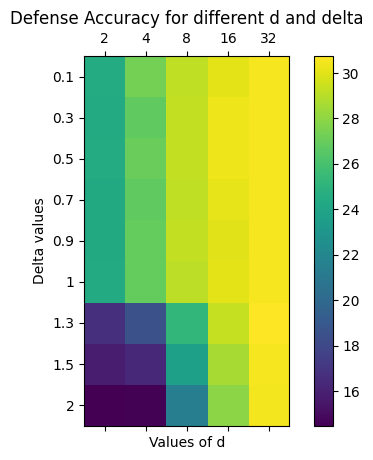

In [25]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# attacks = ["DeepFool", "CarliniL2", "FSGM", "PGD"]
# models = ['Resnet_model','Regnet_x_model','Regnet_y_model']
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
# for model_ref in models:
model_ref = "Resnet_model"
attack = "DeepFool"
model = catalog.load(f"{model_ref}")
    # for attack in attacks:
adver = catalog.load(f'{model_ref}_Adversarial_{attack}@Dataset')
# Create the dataset
d_values = [2, 4, 8, 16, 32]
delta_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1, 1.3 ,1.5, 2]
results = np.zeros((len(delta_values), len(d_values)))

for i, d in enumerate(d_values):
    for j, delta in enumerate(delta_values):
 
        transform_fn = DistortTransform(d=d, delta=delta)
        dataset = AdversarialDataset(adver, transform=transform_fn)
        dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

        model_classifier= init_model(model)
        model_classifier.eval()# we ran only inference for tested data
        correct_defense = 0
        total = 0

        for batch in dataloader:
            images, real_labels = batch["examples"], batch["real_labels"]
            images, real_labels = images.to(device), real_labels.to(device)
            
            with torch.no_grad():
                outputs = model_classifier(images)
                _, predicted = torch.max(outputs.data, 1)
                total += real_labels.size(0)
                correct_defense += (predicted == real_labels).sum().item()
                
        defense_accuracy = correct_defense * 100 / total
        results[j, i] = defense_accuracy
# Plot the results
fig, ax = plt.subplots()
cax = ax.matshow(results, cmap='viridis')
fig.colorbar(cax)

ax.set_xticks(np.arange(len(d_values)))
ax.set_yticks(np.arange(len(delta_values)))
ax.set_xticklabels(d_values)
ax.set_yticklabels(delta_values)
ax.set_xlabel('Values of d')
ax.set_ylabel('Delta values')
ax.set_title('Defense Accuracy for different d and delta')

plt.show()

[10/20/23 22:00:49] INFO     Loading data from 'Resnet_model' (PytorchDatasetModel)...          ]8;id=227734;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=326831;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py#492\492]8;;\

                    INFO     Loading data from 'Resnet_model_Adversarial_DeepFool@Dataset'      ]8;id=634586;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=76922;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py#492\492]8;;\
                             (PytorchDatasetDict)...                                                               

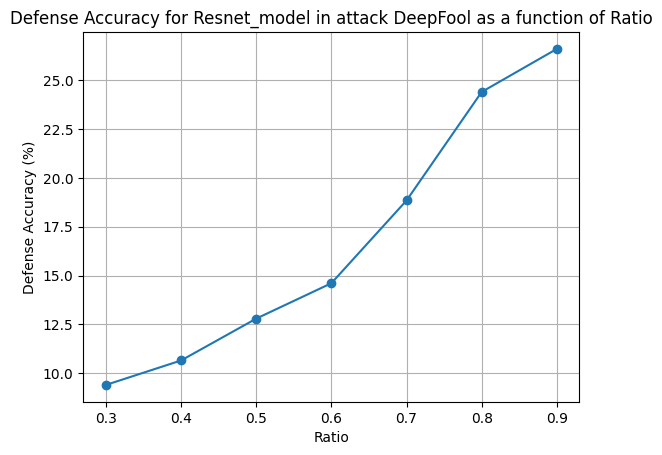

In [20]:

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# attacks = ["DeepFool", "CarliniL2", "FSGM", "PGD"]
# models = ['Resnet_model','Regnet_x_model','Regnet_y_model']
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
# for model_ref in models:
model_ref = "Resnet_model"
attack = "DeepFool"
model = catalog.load(f"{model_ref}")
    # for attack in attacks:
adver = catalog.load(f'{model_ref}_Adversarial_{attack}@Dataset')
# Create the dataset
ratios = [i/10.0 for i in range(3, 10)] # example ratios: 0.3, 0.6, ..., 0.9
defense_accuracies = []
for ratio in ratios:
    transform_fn = ResizePadTransform(ratio=ratio)
    dataset = AdversarialDataset(adver, transform=transform_fn)
    # Create the DataLoader
    batch_size = 512  # or any other desired batch size
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
    model_classifier= init_model(model)
    model_classifier.eval()# we ran only inference for tested data
    correct_defense = 0
    correct_model = 0
    correct_adversarial = 0
    total = 0
    confidence_defense = []
    for batch in dataloader:
        # Assuming model is your pre-trained model
        images, real_labels  = batch["examples"], batch["real_labels"]
        model_labels, adversarial_labels = batch["model_labels"], batch["adversarial_labels"]
        images, real_labels = images.to(device), real_labels.to(device)
        model_labels, adversarial_labels =model_labels.to(device), adversarial_labels.to(device)
        with torch.no_grad():
            outputs = model_classifier(images)
            _, predicted= torch.max(outputs.data, 1)
            confidence_defense.extend(F.softmax(outputs, dim=1).max(dim=1)[0].cpu().numpy())
            total += real_labels.size(0)
            correct_defense += (predicted == real_labels).sum().item()
            correct_model += (model_labels == real_labels).sum().item()
            correct_adversarial += (adversarial_labels == real_labels).sum().item()
    # original_accuracy = correct_model *100 /total
    # adversarial_accuracy = correct_adversarial *100 /total
    defense_accuracy = correct_defense *100 /total
    defense_accuracies.append(defense_accuracy)
    # print(original_accuracy, adversarial_accuracy, defense_accuracy)
# Plot the results
plt.plot(ratios, defense_accuracies, marker='o', linestyle='-')
plt.xlabel('Ratio')
plt.ylabel('Defense Accuracy (%)')
plt.title(f'Defense Accuracy for {model_ref} in attack {attack} as a function of Ratio')
plt.grid(True)
plt.show()

[10/20/23 22:04:11] INFO     Loading data from 'Resnet_model' (PytorchDatasetModel)...          ]8;id=703142;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=748989;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py#492\492]8;;\

                    INFO     Loading data from 'Resnet_model_Adversarial_DeepFool@Dataset'      ]8;id=187138;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=859910;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py#492\492]8;;\
                             (PytorchDatasetDict)...                                                               

[10/20/23 22:04:31] INFO     Loading data from 'Resnet_model_Adversarial_CarliniL2@Dataset'     ]8;id=352069;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=685343;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py#492\492]8;;\
                             (PytorchDatasetDict)...                                                               

[10/20/23 22:04:51] INFO     Loading data from 'Resnet_model_Adversarial_FSGM@Dataset'          ]8;id=676857;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=479048;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py#492\492]8;;\
                             (PytorchDatasetDict)...                                                               

[10/20/23 22:05:11] INFO     Loading data from 'Resnet_model_Adversarial_PGD@Dataset'           ]8;id=848425;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=127225;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py#492\492]8;;\
                             (PytorchDatasetDict)...                                                               

[10/20/23 22:05:32] INFO     Loading data from 'Regnet_x_model' (PytorchDatasetModel)...        ]8;id=211869;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=235528;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py#492\492]8;;\

                    INFO     Loading data from 'Regnet_x_model_Adversarial_DeepFool@Dataset'    ]8;id=301864;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=686828;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py#492\492]8;;\
                             (PytorchDatasetDict)...                                                               

[10/20/23 22:05:58] INFO     Loading data from 'Regnet_x_model_Adversarial_CarliniL2@Dataset'   ]8;id=119036;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=498376;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py#492\492]8;;\
                             (PytorchDatasetDict)...                                                               

[10/20/23 22:06:25] INFO     Loading data from 'Regnet_x_model_Adversarial_FSGM@Dataset'        ]8;id=175463;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=701338;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py#492\492]8;;\
                             (PytorchDatasetDict)...                                                               

[10/20/23 22:06:51] INFO     Loading data from 'Regnet_x_model_Adversarial_PGD@Dataset'         ]8;id=250776;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=261455;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py#492\492]8;;\
                             (PytorchDatasetDict)...                                                               

[10/20/23 22:07:18] INFO     Loading data from 'Regnet_y_model' (PytorchDatasetModel)...        ]8;id=736255;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=416662;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py#492\492]8;;\

                    INFO     Loading data from 'Regnet_y_model_Adversarial_DeepFool@Dataset'    ]8;id=625236;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=207605;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py#492\492]8;;\
                             (PytorchDatasetDict)...                                                               

[10/20/23 22:07:38] INFO     Loading data from 'Regnet_y_model_Adversarial_CarliniL2@Dataset'   ]8;id=101844;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=343614;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py#492\492]8;;\
                             (PytorchDatasetDict)...                                                               

[10/20/23 22:07:58] INFO     Loading data from 'Regnet_y_model_Adversarial_FSGM@Dataset'        ]8;id=692381;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=173806;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py#492\492]8;;\
                             (PytorchDatasetDict)...                                                               

[10/20/23 22:08:18] INFO     Loading data from 'Regnet_y_model_Adversarial_PGD@Dataset'         ]8;id=236538;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=495897;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py#492\492]8;;\
                             (PytorchDatasetDict)...                                                               

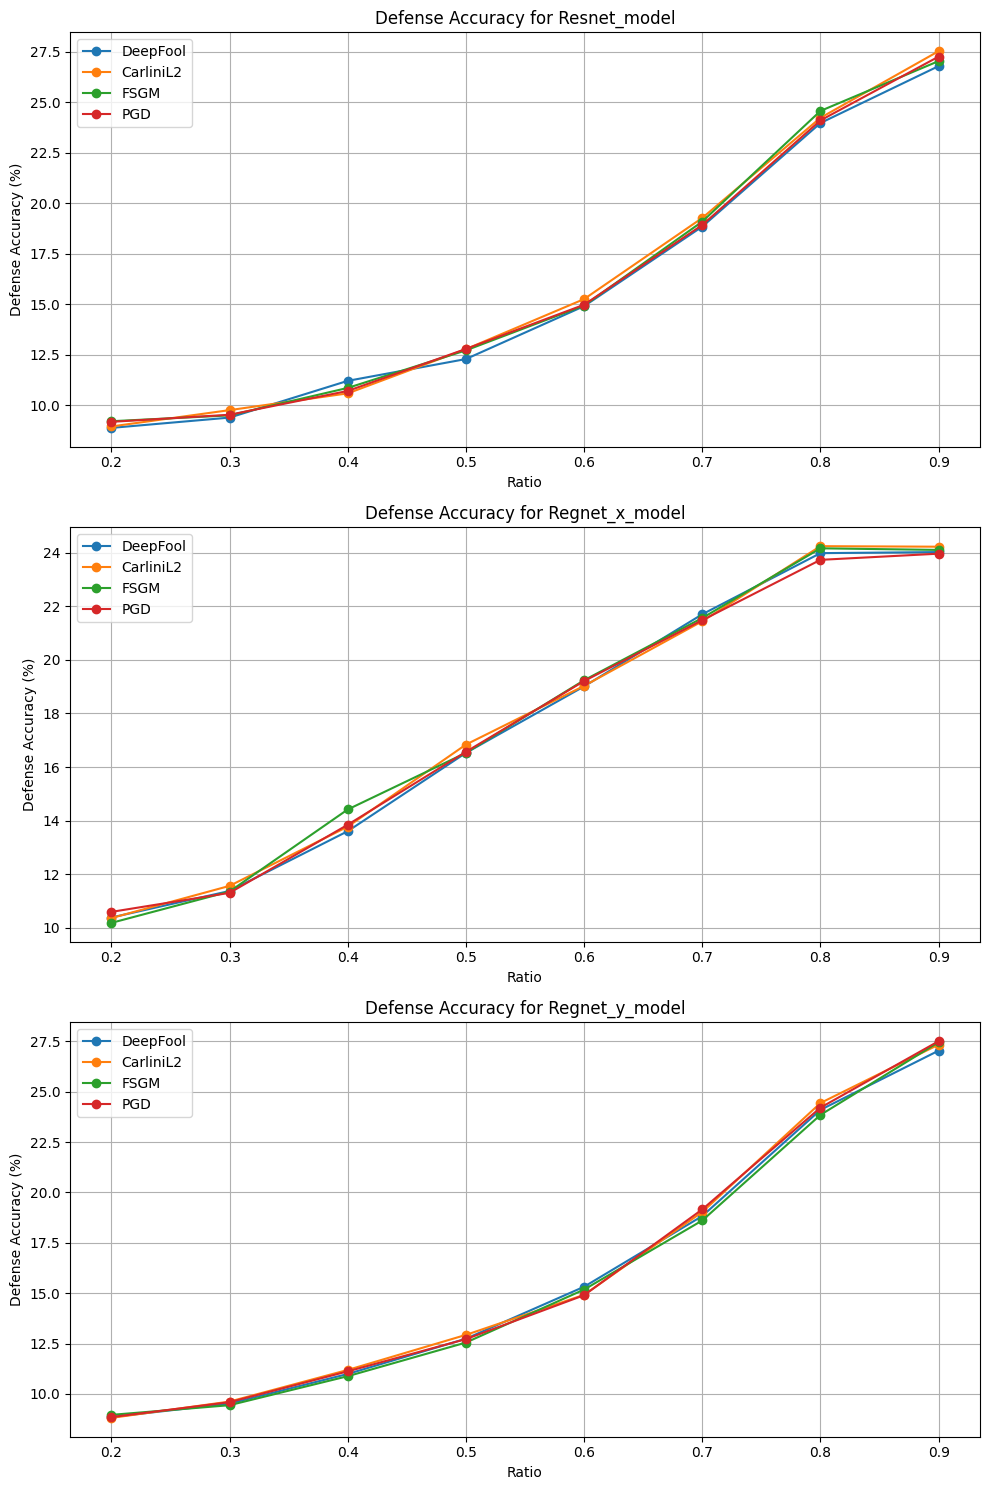

In [22]:
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
attacks = ["DeepFool", "CarliniL2", "FSGM", "PGD"]
models = ['Resnet_model','Regnet_x_model','Regnet_y_model']
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Introduce a set of ratio values to iterate over
ratios = [i/10.0 for i in range(2, 10)]

# Create a dictionary to store defense accuracies for each combination of model and attack
results = {}

for model_ref in models:
    model = catalog.load(f"{model_ref}")
    
    results[model_ref] = {}
    
    for attack in attacks:
        adver = catalog.load(f'{model_ref}_Adversarial_{attack}@Dataset')
        defense_accuracies = []

        for ratio in ratios:
            transform_fn = ResizePadTransform(ratio=ratio)
            dataset = AdversarialDataset(adver, transform=transform_fn)

            batch_size = 512
            dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
            model_classifier = init_model(model)
            model_classifier.eval()
            correct_defense = 0
            total = 0

            for batch in dataloader:
                images, real_labels = batch["examples"], batch["real_labels"]
                images, real_labels = images.to(device), real_labels.to(device)
                with torch.no_grad():
                    outputs = model_classifier(images)
                    _, predicted = torch.max(outputs.data, 1)
                    total += real_labels.size(0)
                    correct_defense += (predicted == real_labels).sum().item()

            defense_accuracy = correct_defense * 100 / total
            defense_accuracies.append(defense_accuracy)

        results[model_ref][attack] = defense_accuracies

# Plot the results
fig, axs = plt.subplots(len(models), 1, figsize=(10, 15))
for i, model_ref in enumerate(models):
    for attack in attacks:
        axs[i].plot(ratios, results[model_ref][attack], label=attack, marker='o', linestyle='-')
    axs[i].set_xlabel('Ratio')
    axs[i].set_ylabel('Defense Accuracy (%)')
    axs[i].set_title(f'Defense Accuracy for {model_ref}')
    axs[i].legend()
    axs[i].grid(True)

plt.tight_layout()
plt.show()

In [14]:

model_classifier= init_model(model)
model_classifier.eval()
correct = 0
total = 0
for batch in dataloader:
    # Assuming model is your pre-trained model
    images, real_labels  = batch["examples"], batch["real_labels"] 
    images, real_labels = images.to(device), real_labels.to(device)
    with torch.no_grad():
        outputs = model_classifier(images)
        _, predicted= torch.max(outputs.data, 1)
        total += real_labels.size(0)
        correct+= (predicted == real_labels).sum().item()
acc = 100*correct/total

        

In [15]:
acc

26.95

# Making the Report

In [1]:


import matplotlib.pyplot as plt
import numpy as np
import itertools as it
from sklearn.metrics import confusion_matrix
# import seaborn as sns
import torch
import torchvision
import torchvision.transforms as transforms
import cv2
# from torchvision.transforms import Compose
from typing import Tuple, Dict

import torch.nn as nn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import torch.nn.functional as F
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#We define the dataset to load the adversarial results
class AdversarialDataset(Dataset):
    def __init__(self, data_dict, transform=None):
        """
        Args:
            data_dict (dict): Dictionary containing adversarial data.
            transform (callable, optional): Optional transform to be applied on the examples.
        """
        self.data_dict = data_dict
        self.transform = transform

    def __len__(self):
        return len(self.data_dict["real_labels"])

    def __getitem__(self, idx):
        sample = {key: value[idx] for key, value in self.data_dict.items()}
        if self.transform:
            sample["examples"] = self.transform(sample["examples"])
        return sample

def Create_data_loader(batch_size=128)-> torch.utils.data.DataLoader:

    transform_test = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
    ])

    testset = torchvision.datasets.CIFAR10(
        root='./data/01_raw', train=False, download=True, transform=transform_test)
    testloader = torch.utils.data.DataLoader(
        testset, batch_size=batch_size, shuffle=False, num_workers=2)
    return testloader


def resize_pad(image, ratio=0.8):
    """
    Resizes and pads an image with zeros to match the original size.

    Args:
        image (numpy.ndarray): The input image to resize and pad.
        ratio (float): The ratio to resize the image by (default 0.8).

    Returns:
        torch.Tensor: The resized and padded image.
    """
    original = image.numpy().transpose((1, 2, 0))
    old_size = original.shape[:2]
    new_size = int(old_size[0] * ratio)
    img = cv2.resize(original, (new_size, new_size))
    max_y = old_size[0] - new_size
    max_x = old_size[1] - new_size
    start_y = np.random.randint(0, max_y)
    start_x = np.random.randint(0, max_x)
    pad = np.zeros_like(original)
    pad[start_y:start_y + new_size, start_x:start_x + new_size] = img
    pad = cv2.flip(pad, 1)
    return torch.from_numpy(pad.transpose((2, 0, 1))).float()

def random_distortion(h, w, d, delta):
    """
    Returns distorted coordinates
    """
    nw = w // d
    nh = h // d
    distorted_coords = torch.zeros(nh+1, nw+1, 2)
    
    for m in range(nw+1):
        for n in range(nh+1):
            dx = (torch.rand(1) * 2 - 1) * delta  
            dy = (torch.rand(1) * 2 - 1) * delta 
            x = m * d + dx
            y = n * d + dy
            distorted_coords[n, m, 0] = x
            distorted_coords[n, m, 1] = y
            
    return distorted_coords


def image_distortion(img, d=4, delta=0.5):
    """
    Apply distortion to a given image.
    img: a tensor of shape (C, H, W)
    d: size of the grid
    delta: distortion limit
    """
    C, H, W = img.shape
    nw = W // d
    nh = H // d
    distorted_coords = random_distortion(H, W, d, delta)
    distorted_image = torch.zeros_like(img)
    
    for m in range(nw+1):
        for n in range(nh+1):
            src_x = m * d
            src_y = n * d
            dest_x = int(distorted_coords[n, m, 0].item())
            dest_y = int(distorted_coords[n, m, 1].item())
            for i in range(d+1):
                for j in range(d+1):
                    if src_y + j < H and src_x + i < W and dest_y + j < H and dest_x + i < W:
                        distorted_image[:, dest_y + j, dest_x + i] = img[:, src_y + j, src_x + i]
                        
    return distorted_image
# Here we define the transformations to be used in the dataloader
class ResizePadTransform:
    def __init__(self, ratio=0.8):
        self.ratio = ratio

    def __call__(self, image):
        return resize_pad(image, ratio=self.ratio)
class DistortTransform:
    def __init__(self, d=4, delta=0.5):
        self.d = d
        self.delta = delta
        
    def __call__(self, img):
        return image_distortion(img, self.d, self.delta)



def init_model(model:nn.Module)->torch.nn.Module:
    # Move model to GPU if available
    model = model.to(device)
    if device == 'cuda':
        model= torch.nn.DataParallel(model)
        cudnn.benchmark = True
    return model

def Padding_defense(dataset: Dict, params:Dict) -> torch.utils.data.DataLoader:
    transform_fn = transforms.Compose([
        ResizePadTransform(ratio = params["padding_ratio"]),
        transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
        ])
    dataset = AdversarialDataset(dataset, transform=transform_fn)
    dataloader = DataLoader(dataset, batch_size=512, shuffle=True)
    return dataloader

def Distort_defense(dataset: Dict, params:Dict) -> torch.utils.data.DataLoader:
    transform_fn = transforms.Compose([
        DistortTransform(d = params["window_size"], delta=params["delta"]),
        transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
        ])
    dataset = AdversarialDataset(dataset, transform=transform_fn)
    dataloader = DataLoader(dataset, batch_size=512, shuffle=True)
    return dataloader

def Padding_Distort_defense(dataset: Dict, params:Dict) -> torch.utils.data.DataLoader:
    transform_fn = transforms.Compose([
        DistortTransform(d=params["window_size"], delta=params["delta"]),
        ResizePadTransform(ratio=params["padding_ratio"]),
        transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
    ])
    dataset = AdversarialDataset(dataset, transform=transform_fn)
    dataloader = DataLoader(dataset, batch_size=512, shuffle=True)
    return dataloader


def Report(dataloader:torch.utils.data.DataLoader,model:nn.Module):
    model_classifier = init_model(model)
    model_classifier.eval()
    correct_defense = 0
    correct_model = 0
    correct_adversarial = 0
    total = 0
    confidence_defense, confidence, confidence_adversarial = [], [], []
    true_labels, model_predictions, adversarial_predictions, defense_predictions = [], [], [], [] 
    
    for batch in dataloader:
        images, real_labels = batch["examples"], batch["real_labels"]
        model_labels, adversarial_labels = batch["model_labels"], batch["adversarial_labels"]
        model_confidence, adversarial_confidence = batch ["confidence"], batch["adversarial_confidence"]

        images, real_labels = images.to(device), real_labels.to(device)
        model_labels, adversarial_labels = model_labels.to(device), adversarial_labels.to(device)
        model_confidence, adversarial_confidence = model_confidence.to(device), adversarial_confidence.to(device) 
        with torch.no_grad():
            outputs = model_classifier(images)
            _, predicted = torch.max(outputs.data, 1)
            confidence_defense.extend(F.softmax(outputs, dim=1).max(dim=1)[0].cpu().numpy())
            confidence.extend(model_confidence.cpu().numpy())
            confidence_adversarial.extend(adversarial_confidence.cpu().numpy())
            total += real_labels.size(0)
            correct_defense += (predicted == real_labels).sum().item()
            correct_model += (model_labels == real_labels).sum().item()
            correct_adversarial += (adversarial_labels == real_labels).sum().item()
            true_labels.extend(real_labels.cpu().numpy())
            model_predictions.extend(model_labels.cpu().numpy())
            adversarial_predictions.extend(adversarial_labels.cpu().numpy())
            defense_predictions.extend(predicted.cpu().numpy())
            

    original_accuracy = correct_model *100 /total
    adversarial_accuracy = correct_adversarial *100 /total
    defense_accuracy = correct_defense *100 /total
    Accuracies = {"Accuracy":original_accuracy,
                  "Adversarial_accuracy":adversarial_accuracy, 
                  "Defense_accuracy":defense_accuracy}
    Labels = {"true_labels": true_labels, 
              "model_labels": model_predictions, 
              "adversarial_labels":adversarial_predictions, 
              "defense_labels":defense_predictions}
    Confidences = {"model_confidence":confidence,
                   "adversarial_confidence":confidence_adversarial,
                   "defense_confidence":confidence_defense}

    
    return Accuracies, Labels, Confidences


In [8]:

# attacks = ["DeepFool", "CarliniL2", "FSGM", "PGD"]
# models = ['Resnet_model','Regnet_x_model','Regnet_y_model']
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
attack = "DeepFool"
model_ref = "Resnet_model"
parameters={'Resnet_model': {'window_size': 8, 'delta': 0.1, 'padding_ratio': 0.9}}

model = catalog.load(f"{model_ref}")

adver = catalog.load(f'{model_ref}_Adversarial_{attack}@Dataset')
dataloader = Padding_defense(adver,parameters[f"{model_ref}"])
metrics, labels, confidences = Report(dataloader,model)
#print(f"{model_ref} with attack: {attack}")
#print(metrics)

[10/27/23 14:35:31] INFO     Loading data from 'Resnet_model' (PytorchDatasetModel)...          ]8;id=929226;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=157365;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py#492\492]8;;\

                    INFO     Loading data from 'Resnet_model_Adversarial_DeepFool@Dataset'      ]8;id=324146;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=391696;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py#492\492]8;;\
                             (PytorchDatasetDict)...                                                               

In [80]:
from sklearn.metrics import confusion_matrix
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Compute confusion matrices
conf_matrix_defense = confusion_matrix(labels['true_labels'], labels['defense_labels'])
conf_matrix_model = confusion_matrix(labels['true_labels'], labels['model_labels'])
conf_matrix_adversarial = confusion_matrix(labels['true_labels'], labels['adversarial_labels'])

def plot_sub_confusion_matrix(fig, cm, classes, position, show_colorbar=False):
    """
    This function adds a heatmap of the confusion matrix to a subplot position.
    """
    
    hm = go.Heatmap(
        z=cm[::-1],
        x=classes,
        y=classes[::-1], 
        colorscale='blues',
        showscale=show_colorbar,
        coloraxis="coloraxis",
        hoverinfo="x+y+z",
        hovertemplate="Predicted: %{x}<br>Real: %{y}<br>Number: %{z}<extra></extra>"  # <extra></extra> hides additional hover info
    )

    fig.add_trace(hm, row=1, col=position)

    for i, row in enumerate(cm):
        for j, val in enumerate(row):
             fig.add_annotation(
                dict(
                    x=classes[j], 
                    y=classes[i], 
                    xref=f'x{position}',
                    yref=f'y{position}',
                    text=f"<b>{val}</b>",
                    showarrow=False,
                    font=dict(
                        color="gray",
                        size=12
                    )
                )
            )
    fig.update_yaxes(title_text="True label", row=1, col=position)
    fig.update_xaxes(title_text="Predicted label", row=1, col=position)

fig = make_subplots(
    rows=1, cols=3,
    shared_yaxes=True,
    subplot_titles=('Model', 'Adversarial', 'Defense'),
    horizontal_spacing=0.01
)

plot_sub_confusion_matrix(fig, conf_matrix_model, classes, 1)
plot_sub_confusion_matrix(fig, conf_matrix_adversarial, classes, 2)
plot_sub_confusion_matrix(fig, conf_matrix_defense, classes, 3, show_colorbar=True)

fig.update_layout(title=dict(text="Confusion Matrices", x=0.5, xanchor='center'), height=600, width=1500)
fig.show()

In [81]:

from sklearn.metrics import confusion_matrix
import plotly.graph_objects as go
from plotly.subplots import make_subplots


def plot_sub_confusion_matrix(fig, cm, classes, position, show_colorbar=False):
    """
    This function adds a heatmap of the confusion matrix to a subplot position.
    """
    
    hm = go.Heatmap(
        z=cm[::-1],
        x=classes,
        y=classes[::-1], 
        colorscale='blues',
        showscale=show_colorbar,
        coloraxis="coloraxis",
        hoverinfo="x+y+z",
        hovertemplate="Predicted: %{x}<br>Real: %{y}<br>Number: %{z}<extra></extra>"  # <extra></extra> hides additional hover info
    )

    fig.add_trace(hm, row=1, col=position)

    for i, row in enumerate(cm):
        for j, val in enumerate(row):
             fig.add_annotation(
                dict(
                    x=classes[j], 
                    y=classes[i], 
                    xref=f'x{position}',
                    yref=f'y{position}',
                    text=f"<b>{val}</b>",
                    showarrow=False,
                    font=dict(
                        color="gray",
                        size=12
                    )
                )
            )
    fig.update_yaxes(title_text="True label", row=1, col=position)
    fig.update_xaxes(title_text="Predicted label", row=1, col=position)

def plot_confusion_matrix(labels,classes):
    # Compute confusion matrices
    conf_matrix_defense = confusion_matrix(labels['true_labels'], labels['defense_labels'])
    conf_matrix_model = confusion_matrix(labels['true_labels'], labels['model_labels'])
    conf_matrix_adversarial = confusion_matrix(labels['true_labels'], labels['adversarial_labels'])

    fig = make_subplots(
        rows=1, cols=3,
        shared_yaxes=True,
        subplot_titles=('Model', 'Adversarial', 'Defense'),
        horizontal_spacing=0.01
    )
    plot_sub_confusion_matrix(fig, conf_matrix_model, classes, 1)
    plot_sub_confusion_matrix(fig, conf_matrix_adversarial, classes, 2)
    plot_sub_confusion_matrix(fig, conf_matrix_defense, classes, 3, show_colorbar=True)

    fig.update_layout(title=dict(text="Confusion Matrices", x=0.5, xanchor='center'), height=600, width=1500)
    return fig

In [82]:
plot_confusion_matrix(labels=labels,classes=classes)

In [84]:
def Report(dataloader:torch.utils.data.DataLoader,model:nn.Module,Report_params):
    model_classifier = init_model(model)
    model_classifier.eval()
    correct_defense = 0
    correct_model = 0
    correct_adversarial = 0
    total = 0
    confidence_defense, confidence, confidence_adversarial = [], [], []
    true_labels, model_predictions, adversarial_predictions, defense_predictions = [], [], [], [] 
    
    for batch in dataloader:
        images, real_labels = batch["examples"], batch["real_labels"]
        model_labels, adversarial_labels = batch["model_labels"], batch["adversarial_labels"]
        model_confidence, adversarial_confidence = batch ["confidence"], batch["adversarial_confidence"]

        images, real_labels = images.to(device), real_labels.to(device)
        model_labels, adversarial_labels = model_labels.to(device), adversarial_labels.to(device)
        model_confidence, adversarial_confidence = model_confidence.to(device), adversarial_confidence.to(device) 
        with torch.no_grad():
            outputs = model_classifier(images)
            _, predicted = torch.max(outputs.data, 1)
            confidence_defense.extend(F.softmax(outputs, dim=1).max(dim=1)[0].cpu().numpy())
            confidence.extend(model_confidence.cpu().numpy())
            confidence_adversarial.extend(adversarial_confidence.cpu().numpy())
            total += real_labels.size(0)
            correct_defense += (predicted == real_labels).sum().item()
            correct_model += (model_labels == real_labels).sum().item()
            correct_adversarial += (adversarial_labels == real_labels).sum().item()
            true_labels.extend(real_labels.cpu().numpy())
            model_predictions.extend(model_labels.cpu().numpy())
            adversarial_predictions.extend(adversarial_labels.cpu().numpy())
            defense_predictions.extend(predicted.cpu().numpy())
            

    original_accuracy = correct_model *100 /total
    adversarial_accuracy = correct_adversarial *100 /total
    defense_accuracy = correct_defense *100 /total

    Accuracies = {"Accuracy":original_accuracy,
                  "Adversarial_accuracy":adversarial_accuracy, 
                  "Defense_accuracy":defense_accuracy}
    
    Labels = {"true_labels": true_labels, 
              "model_labels": model_predictions, 
              "adversarial_labels":adversarial_predictions, 
              "defense_labels":defense_predictions}
    
    Confidences = {"model_confidence":confidence,
                   "adversarial_confidence":confidence_adversarial,
                   "defense_confidence":confidence_defense}

    
    return Accuracies, Labels, Confidences, plot_confusion_matrix(labels=Labels,classes=Report_params["Classes"])

In [85]:

classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
attack = "DeepFool"
model_ref = "Resnet_model"
parameters={'Resnet_model': {'window_size': 8, 'delta': 0.1, 'padding_ratio': 0.9}}

model = catalog.load(f"{model_ref}")

adver = catalog.load(f'{model_ref}_Adversarial_{attack}@Dataset')
dataloader = Padding_defense(adver,parameters[f"{model_ref}"])
metrics, labels, confidences,plot_of_confusion = Report(dataloader,model,catalog.load("params:Parameters_defenses"))

[10/27/23 17:16:31] INFO     Loading data from 'Resnet_model' (PytorchDatasetModel)...          ]8;id=544045;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=661500;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py#492\492]8;;\

                    INFO     Loading data from 'Resnet_model_Adversarial_DeepFool@Dataset'      ]8;id=8628;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=958919;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py#492\492]8;;\
                             (PytorchDatasetDict)...                                                               

                    INFO     Loading data from 'params:Parameters_defenses' (MemoryDataset)...  ]8;id=446176;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=153197;file:///home/jamontanac/miniconda3/envs/kedro-environment/lib/python3.10/site-packages/kedro/io/data_catalog.py#492\492]8;;\

# now testing for confidences

In [90]:

def plot_confidence_distribution(Confidences, Labels, classes):
    confidences_model = Confidences["model_confidence"]
    confidences_adversarial = Confidences["adversarial_confidence"]
    confidences_defense = Confidences["defense_confidence"]

    true_labels = Labels["true_labels"]

    # Create a figure and a set of subplots
    fig, axs = plt.subplots(len(classes), 3, figsize=(15, 5*len(classes)))
    fig.suptitle('Confidence Distribution Per Class', fontsize=16)

    for idx, class_name in enumerate(classes):
        # Model
        axs[idx][0].hist([confidences_model[i] for i, label in enumerate(true_labels) if label == idx], bins=50, alpha=0.7, label='Model', color='blue')
        axs[idx][0].set_title(f'{class_name} - Model')
        axs[idx][0].set_xlabel('Confidence')
        axs[idx][0].set_ylabel('Frequency')

        # Adversarial
        axs[idx][1].hist([confidences_adversarial[i] for i, label in enumerate(true_labels) if label == idx], bins=50, alpha=0.7, label='Adversarial', color='red')
        axs[idx][1].set_title(f'{class_name} - Adversarial')
        axs[idx][1].set_xlabel('Confidence')
        axs[idx][1].set_ylabel('Frequency')

        # Defense
        axs[idx][2].hist([confidences_defense[i] for i, label in enumerate(true_labels) if label == idx], bins=50, alpha=0.7, label='Defense', color='green')
        axs[idx][2].set_title(f'{class_name} - Defense')
        axs[idx][2].set_xlabel('Confidence')
        axs[idx][2].set_ylabel('Frequency')

    # Adjust layout
    plt.tight_layout()
    plt.subplots_adjust(top=0.95)
    plt.show()

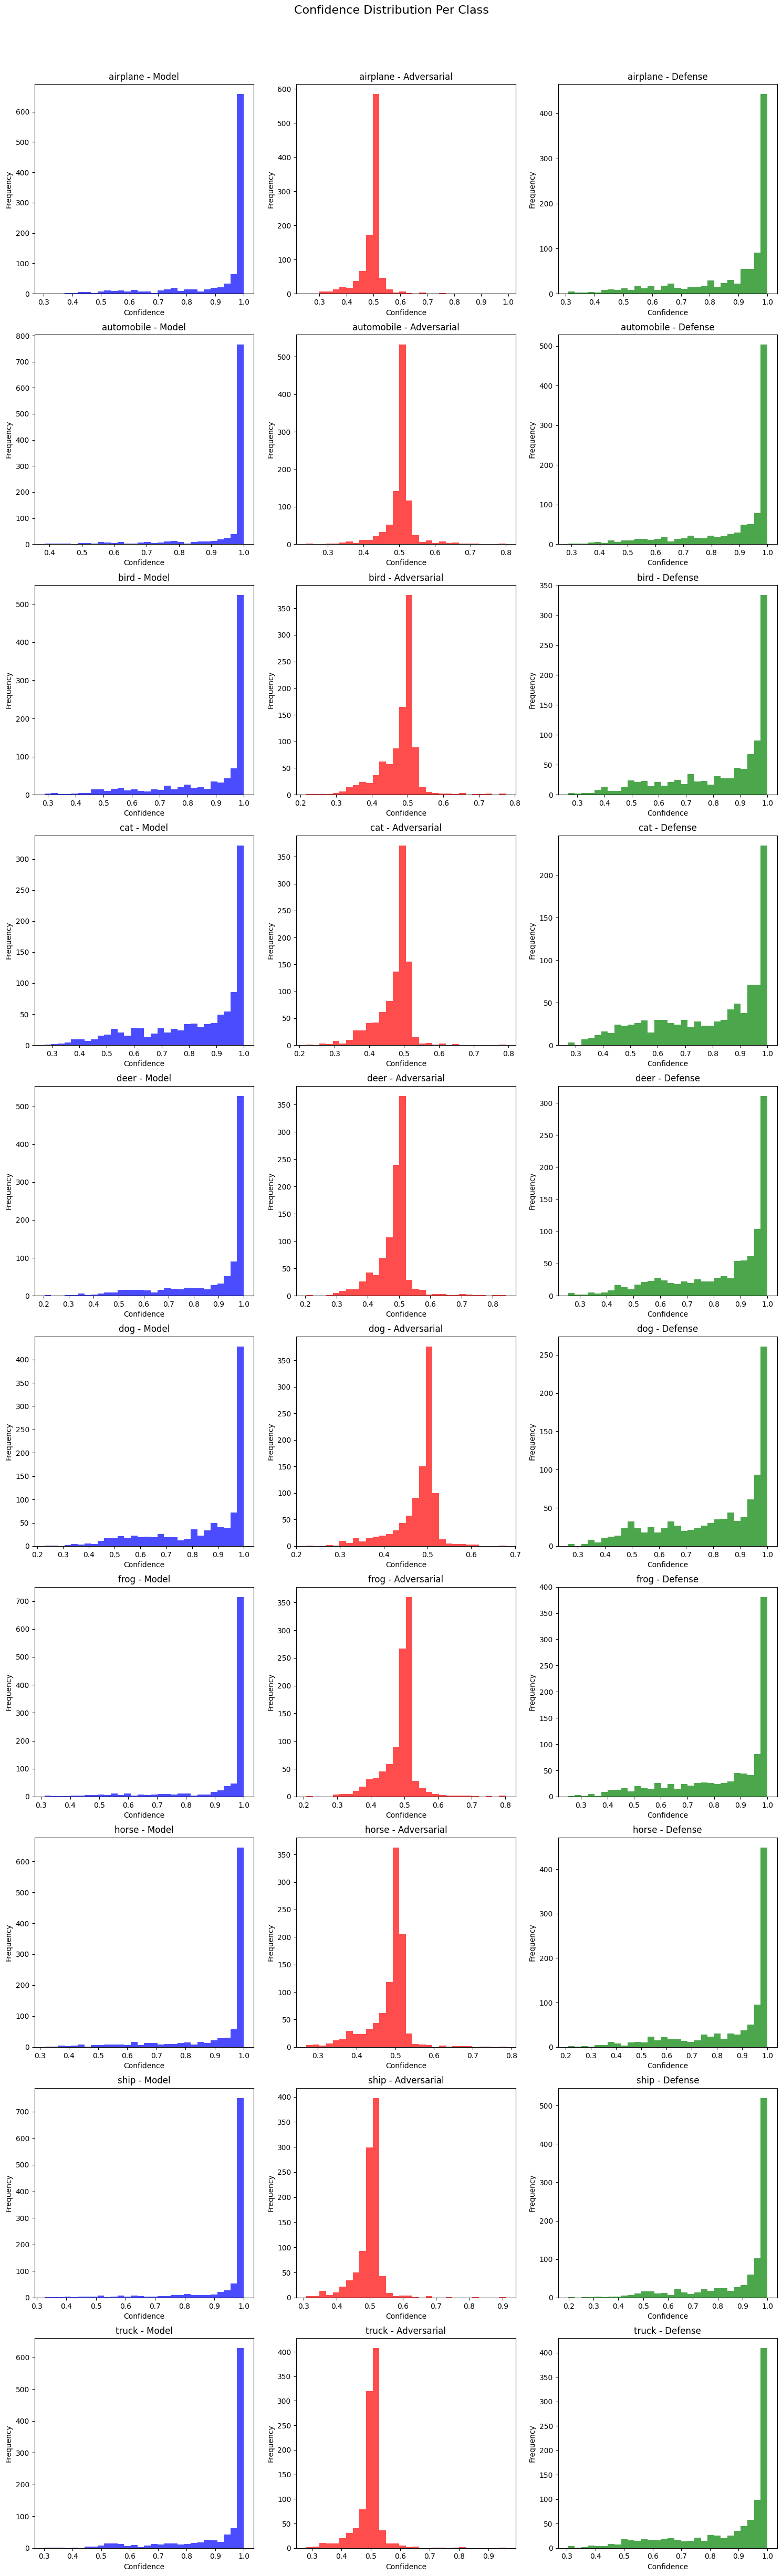

In [91]:
plot_confidence_distribution(confidences,labels,classes)

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confidence_distribution(Confidences, Labels, classes):
    confidences_model = Confidences["model_confidence"]
    confidences_adversarial = Confidences["adversarial_confidence"]
    confidences_defense = Confidences["defense_confidence"]

    true_labels = Labels["true_labels"]

    # Create a figure
    fig, axs = plt.subplots(len(classes), 3, figsize=(15, 5*len(classes)))
    fig.suptitle('Confidence Distribution Per Class', fontsize=16)

    for idx, class_name in enumerate(classes):
        # Model
        sns.histplot([confidences_model[i] for i, label in enumerate(true_labels) if label == idx], bins=50, ax=axs[idx][0], color='blue', kde=True)
        axs[idx][0].set_title(f'{class_name} - Model')
        axs[idx][0].set_xlabel('Confidence')
        axs[idx][0].set_ylabel('Density')

        # Adversarial
        sns.histplot([confidences_adversarial[i] for i, label in enumerate(true_labels) if label == idx], bins=50, ax=axs[idx][1], color='red', kde=True)
        axs[idx][1].set_title(f'{class_name} - Adversarial')
        axs[idx][1].set_xlabel('Confidence')
        axs[idx][1].set_ylabel('Density')

        # Defense
        sns.histplot([confidences_defense[i] for i, label in enumerate(true_labels) if label == idx], bins=50, ax=axs[idx][2], color='green', kde=True)
        axs[idx][2].set_title(f'{class_name} - Defense')
        axs[idx][2].set_xlabel('Confidence')
        axs[idx][2].set_ylabel('Density')

    # Adjust layout
    plt.tight_layout()
    plt.subplots_adjust(top=0.96)
    plt.show()

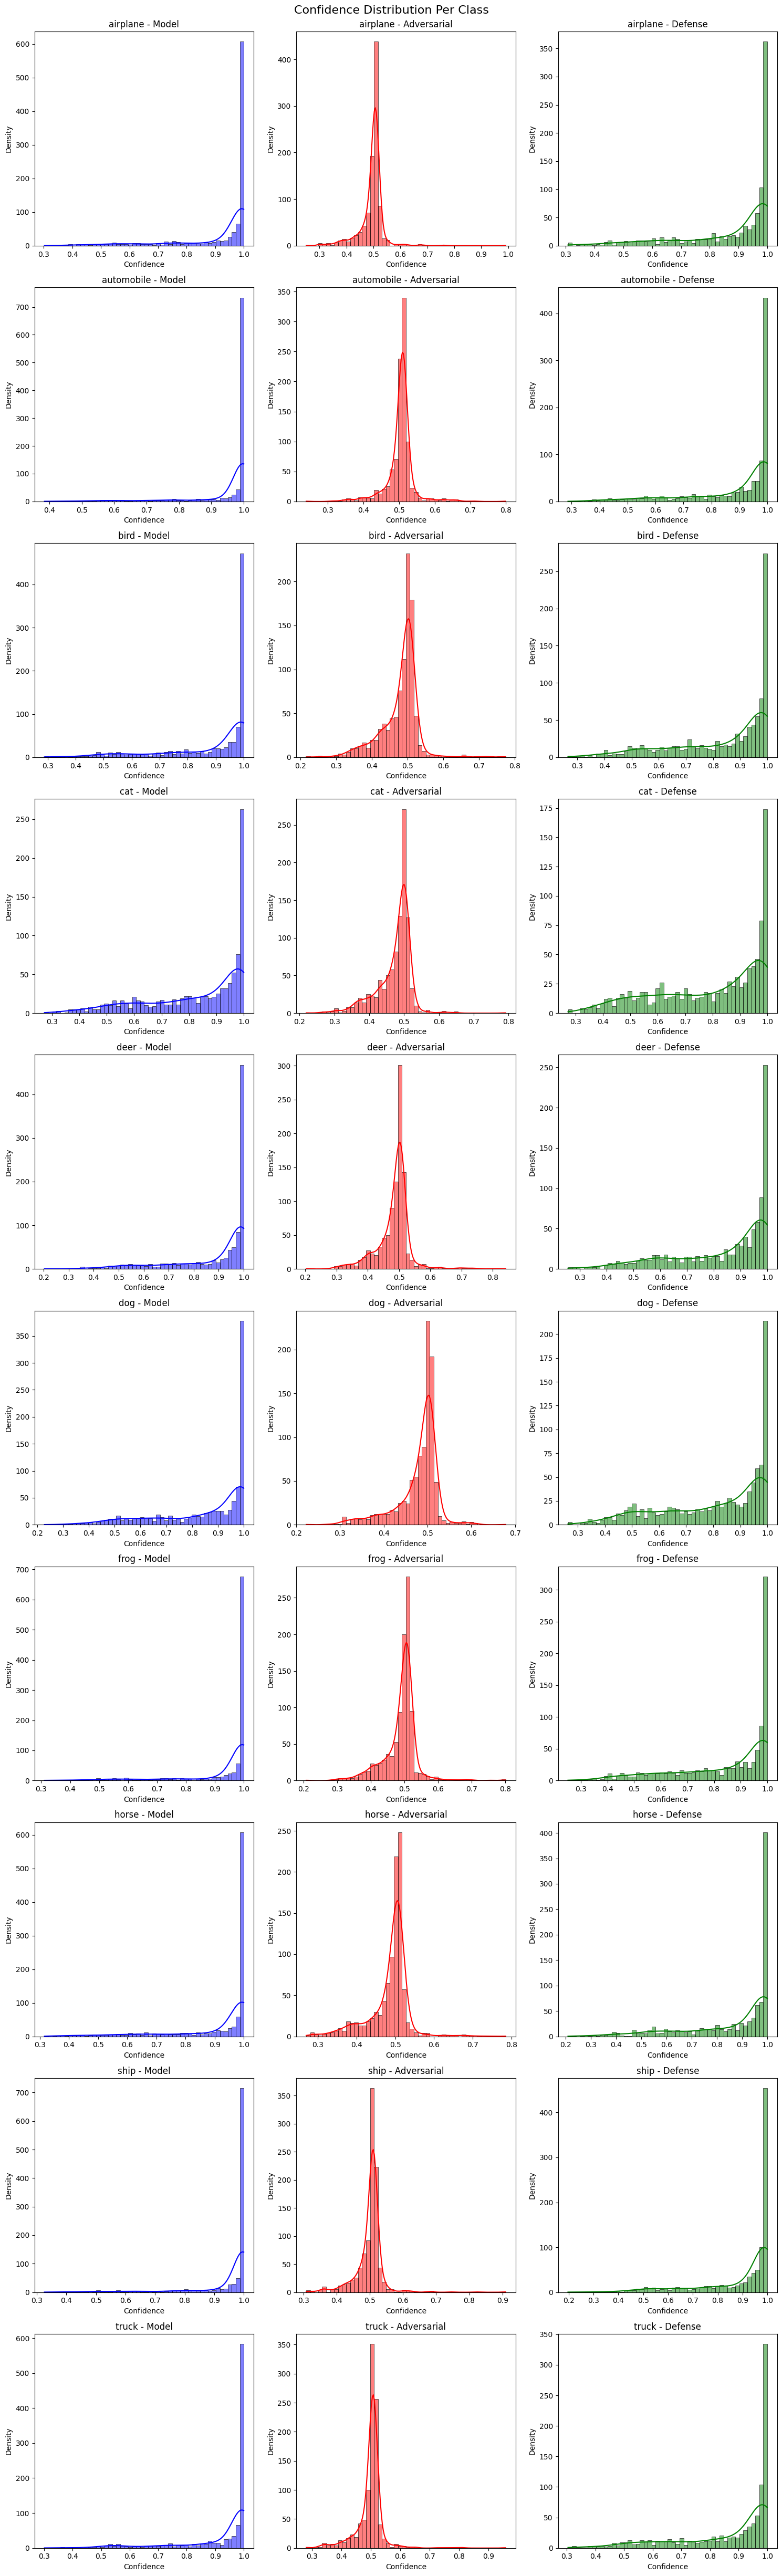

In [97]:

plot_confidence_distribution(confidences,labels,classes)

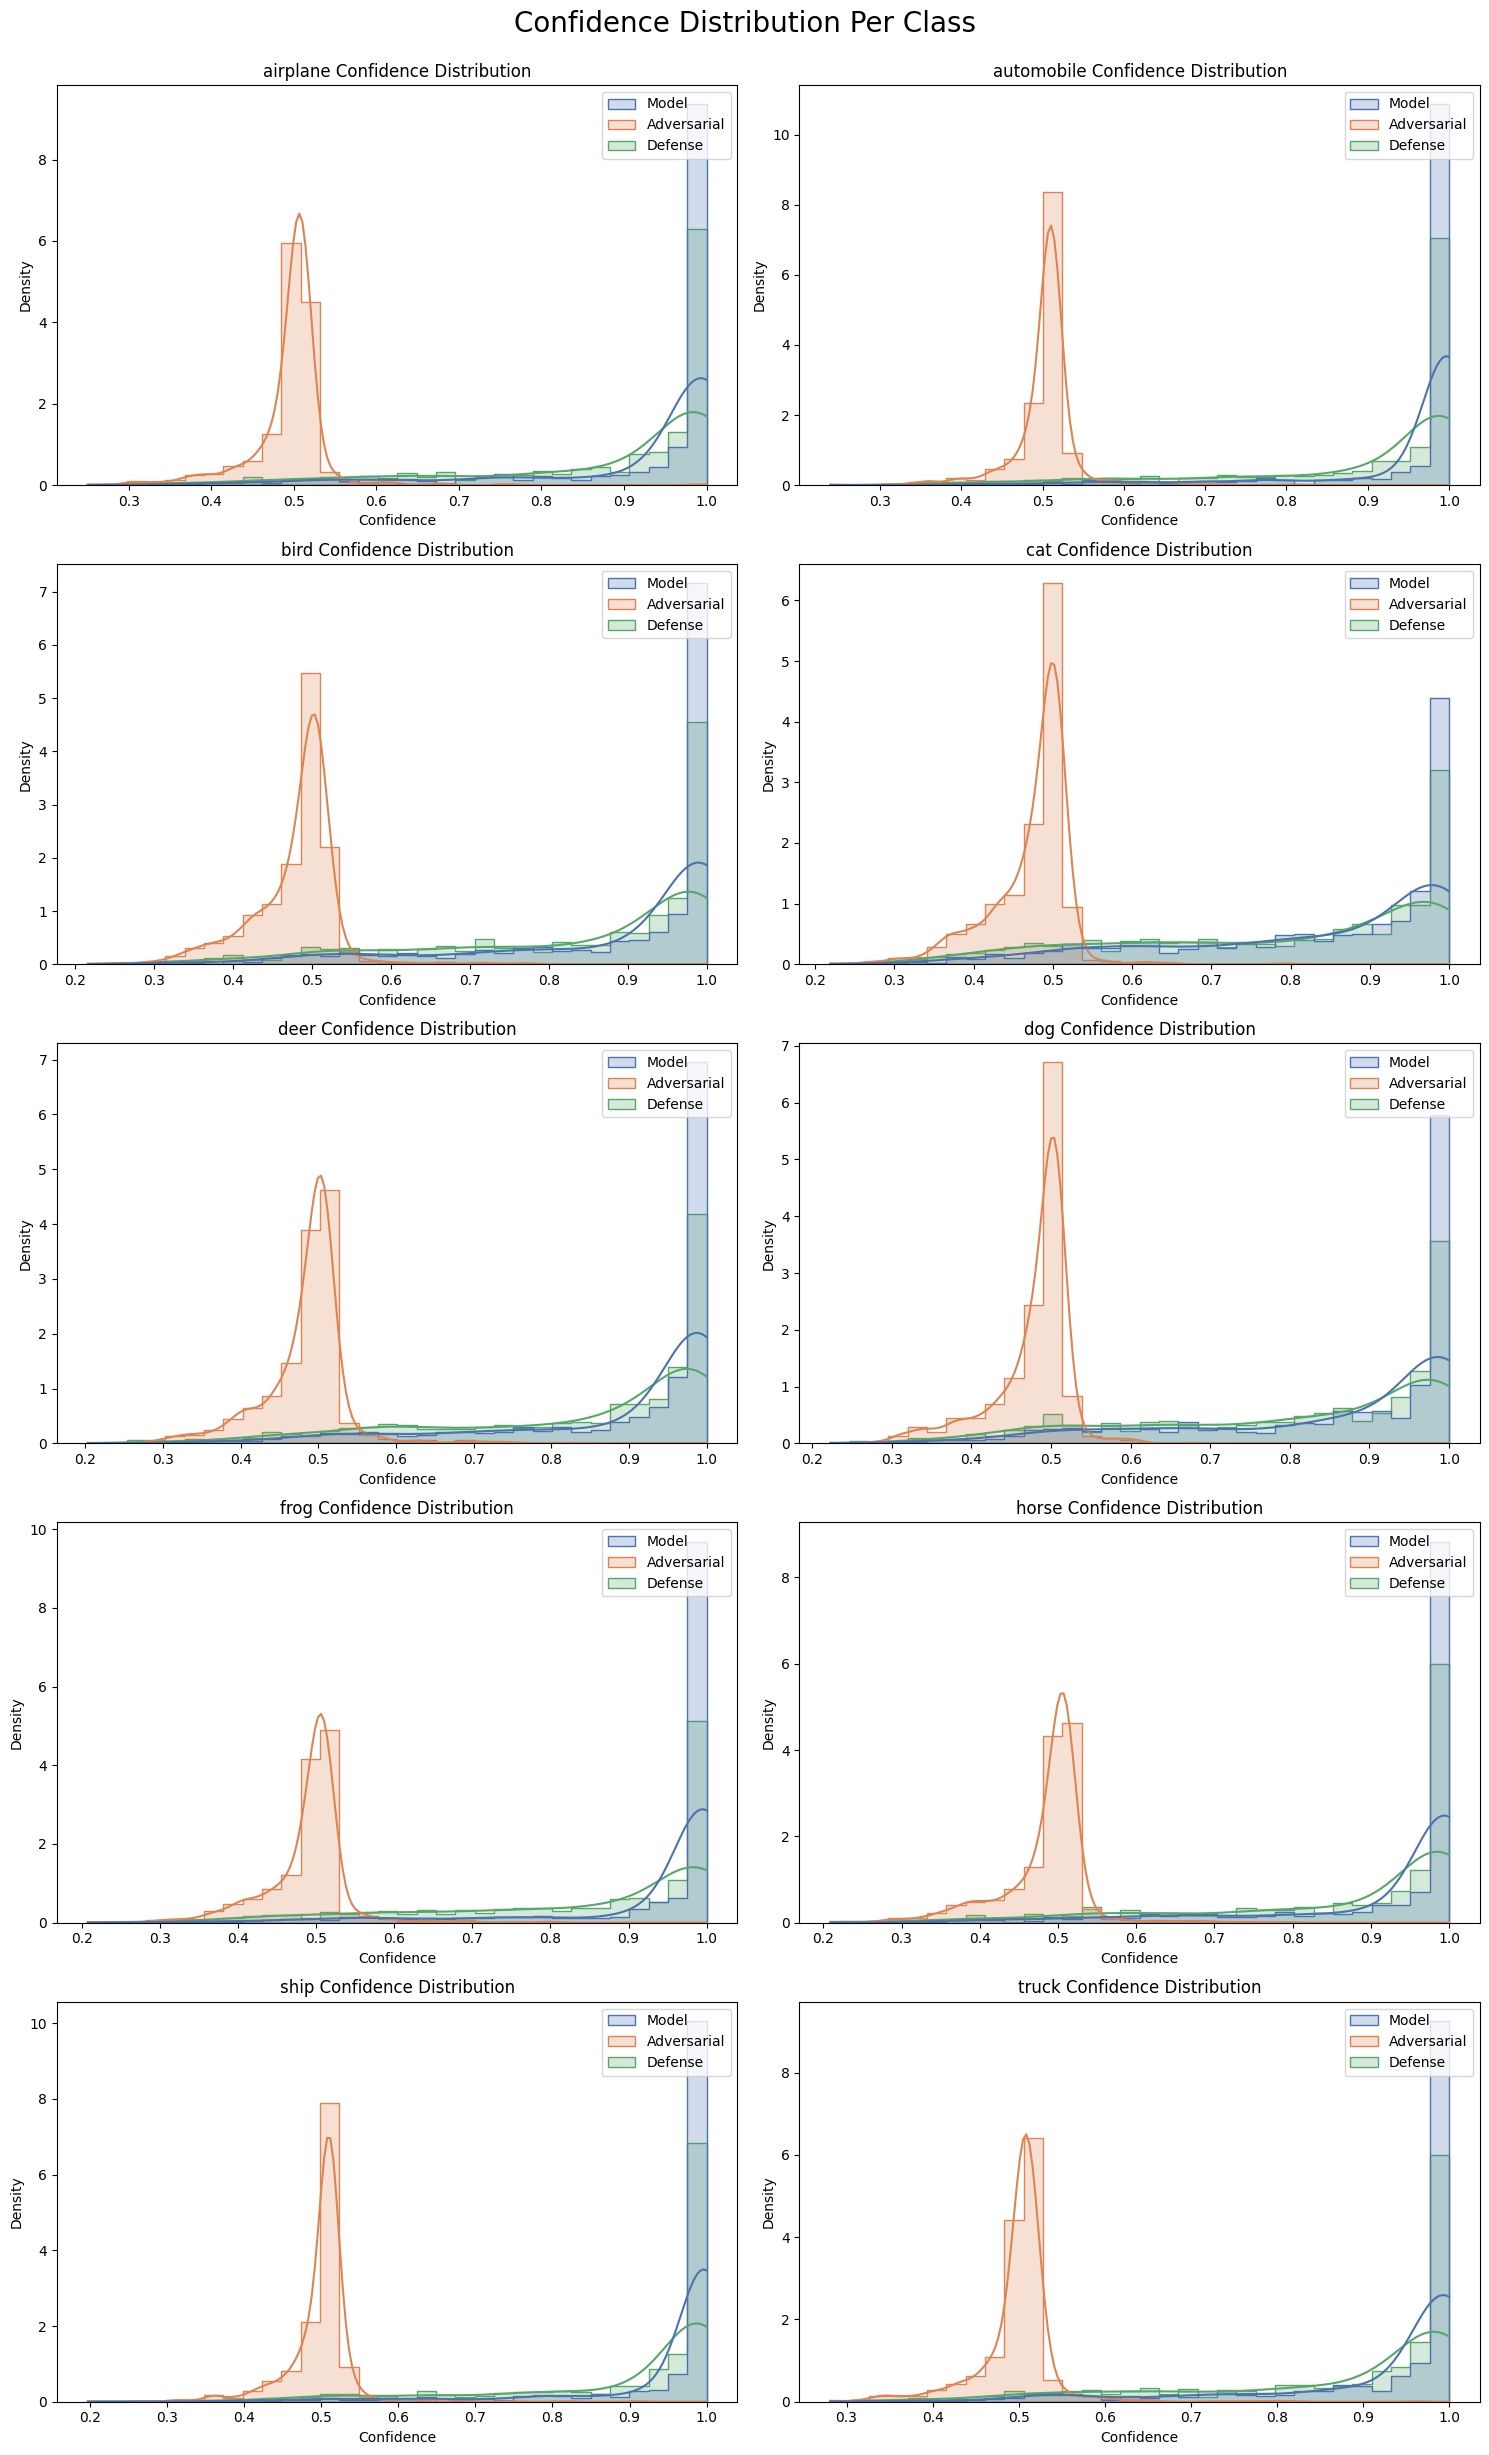

In [223]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette("deep")
def plot_confidence_distribution(Confidences, Labels, classes):
    confidences_model = Confidences["model_confidence"]
    confidences_adversarial = Confidences["adversarial_confidence"]
    confidences_defense = Confidences["defense_confidence"]

    true_labels = Labels["true_labels"]

    
    fig, axs = plt.subplots(5, 2, figsize=(15, 25))
    
    fig.suptitle('Confidence Distribution Per Class', fontsize=20)

    for idx, class_name in enumerate(classes):
        row = idx // 2
        col = idx % 2
        # Model
        values_model = [confidences_model[i] for i, label in enumerate(true_labels) if label == idx]
        num_bins = int(np.sqrt(len(values_model))) +1

        # Adversarial
        values_adversarial = [confidences_adversarial[i] for i, label in enumerate(true_labels) if label == idx]
        # Defense
        values_defense = [confidences_defense[i] for i, label in enumerate(true_labels) if label == idx]
        data=pd.DataFrame({"Model":values_model,"Adversarial":values_adversarial,"Defense":values_defense})

        # print(num_bins)
        sns.histplot(data=data, bins=num_bins, ax=axs[row][col], kde=True,stat="density", element="step")

        # sns.histplot(values_adversarial, bins = num_bins, ax=axs[row][col], color='firebrick', kde=True, label='Adversarial',stat="density")

        # sns.histplot(values_defense, bins = num_bins, ax=axs[row][col], color='darkgreen', kde=True, label='Defense',stat="density",alpha=0.8)

        axs[row][col].set_title(f'{class_name} Confidence Distribution')
        axs[row][col].set_xlabel('Confidence')
        axs[row][col].set_ylabel('Density')
        # axs[row][col].legend()

    # Adjust layout
    plt.tight_layout()
    plt.subplots_adjust(top=0.95)
    plt.show()


def plot_confidence_cummulative(Confidences, Labels, classes):
    confidences_model = Confidences["model_confidence"]
    confidences_adversarial = Confidences["adversarial_confidence"]
    confidences_defense = Confidences["defense_confidence"]

    true_labels = Labels["true_labels"]

    
    fig, axs = plt.subplots(5, 2, figsize=(15, 25))
    
    fig.suptitle('Confidence Cumulative Per Class', fontsize=20)

    for idx, class_name in enumerate(classes):
        row = idx // 2
        col = idx % 2
        # Model
        values_model = [confidences_model[i] for i, label in enumerate(true_labels) if label == idx]

        # Adversarial
        values_adversarial = [confidences_adversarial[i] for i, label in enumerate(true_labels) if label == idx]
        # Defense
        values_defense = [confidences_defense[i] for i, label in enumerate(true_labels) if label == idx]
        
        data=pd.DataFrame({"Model":values_model,"Adversarial":values_adversarial,"Defense":values_defense})

        sns.histplot(data=data, ax=axs[row][col],stat="density", element="step",cumulative=True,fill=False)

        axs[row][col].set_title(f'{class_name} Confidence Cumulative')
        axs[row][col].set_xlabel('Confidence')
        axs[row][col].set_ylabel('Density')
        # axs[row][col].legend()

    # Adjust layout
    plt.tight_layout()
    plt.subplots_adjust(top=0.95)
    plt.show()


plot_confidence_distribution(confidences,labels,classes)

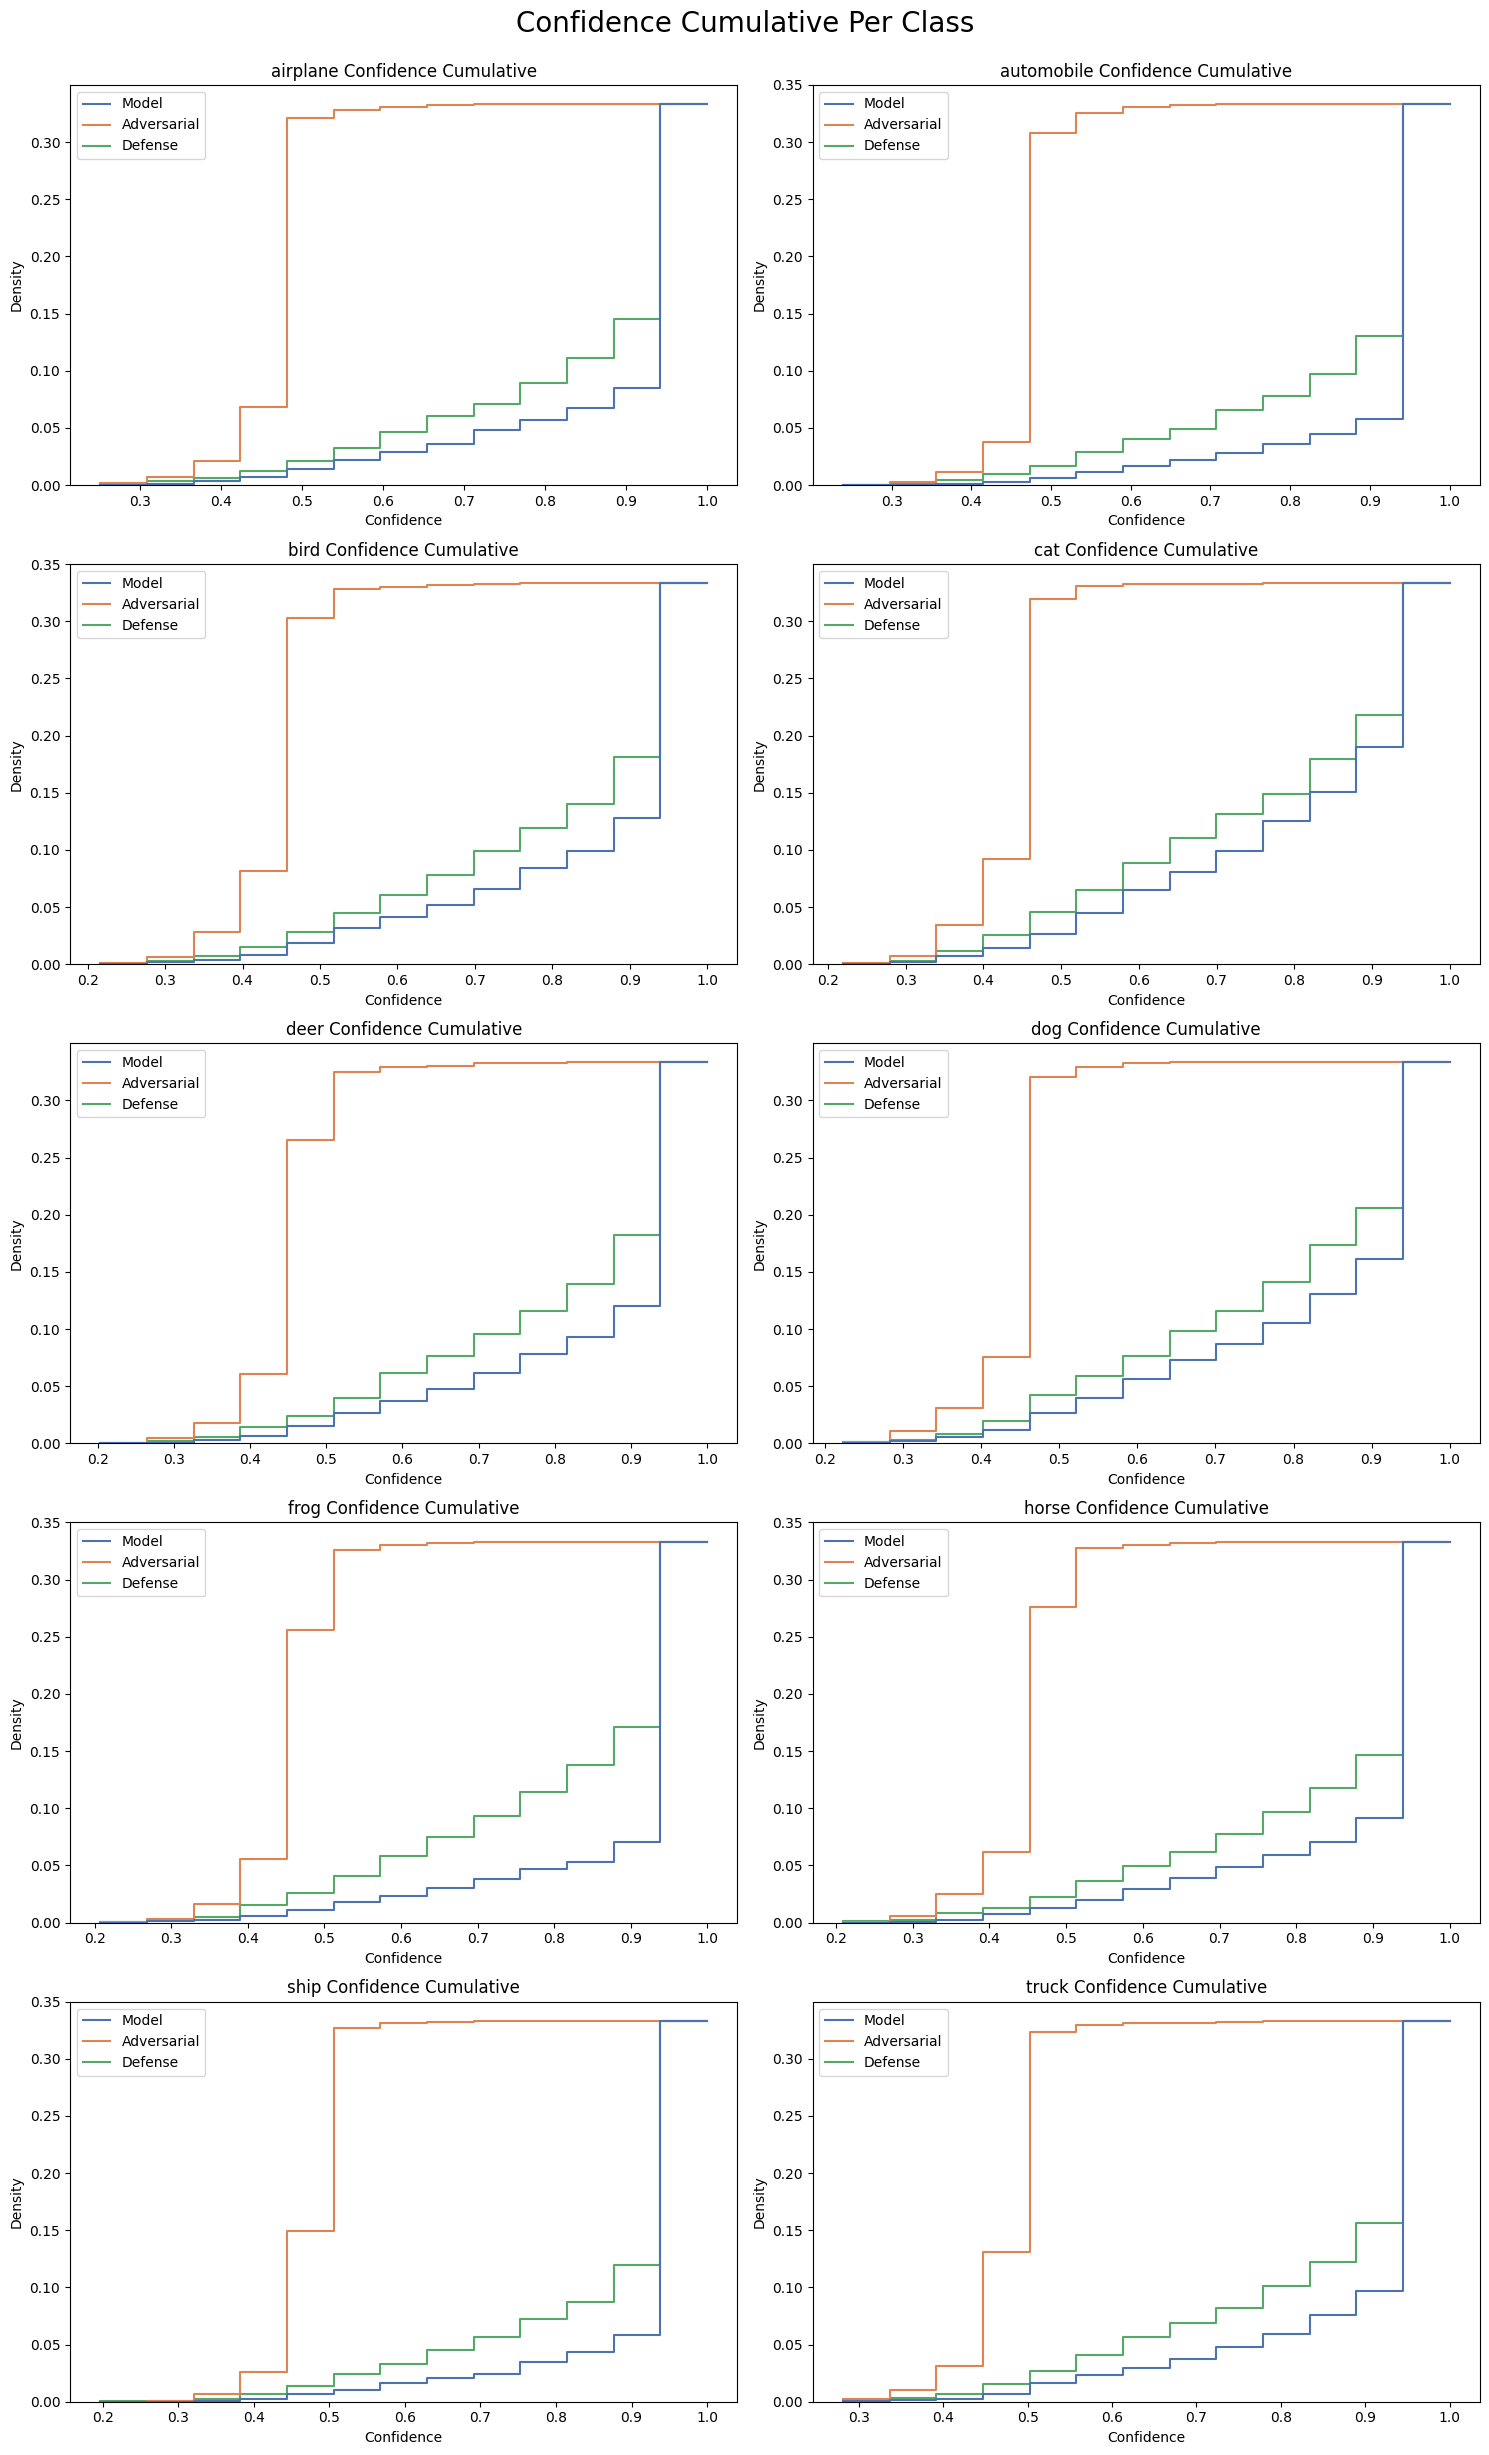

In [224]:

plot_confidence_cummulative(confidences,labels,classes)

In [229]:

def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=15, cmap=cmap, **kwargs)

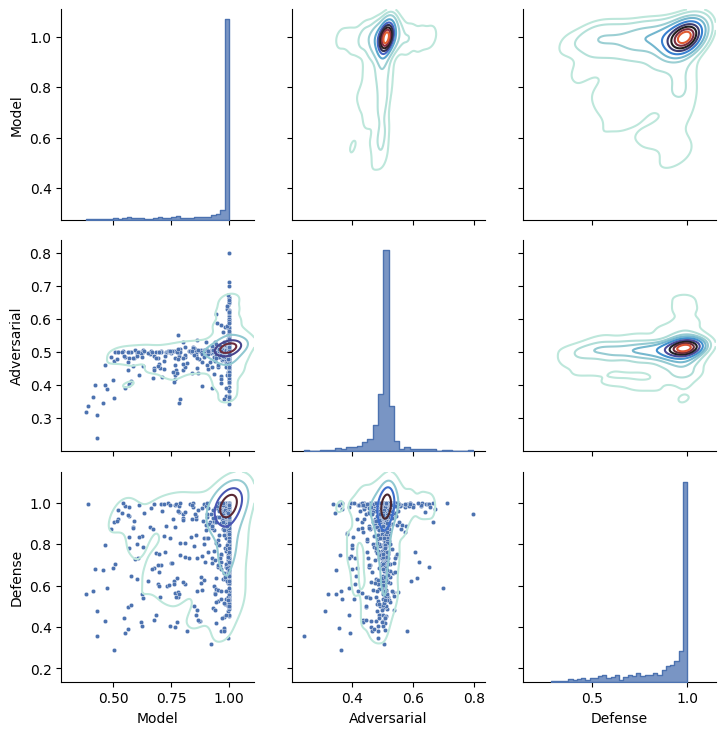

In [259]:
import matplotlib.patches as mpatches
confidences_model = confidences["model_confidence"]
confidences_adversarial = confidences["adversarial_confidence"]
confidences_defense = confidences["defense_confidence"]
sns.color_palette("deep")
true_labels = labels["true_labels"]
    
# fig, axs = plt.subplots(5, 2, figsize=(15, 25))
    
# fig.suptitle('Confidence Cumulative Per Class', fontsize=20)
idx = 1
class_name = classes[1]

values_model = [confidences_model[i] for i, label in enumerate(true_labels) if label == idx]

values_adversarial = [confidences_adversarial[i] for i, label in enumerate(true_labels) if label == idx]
values_defense = [confidences_defense[i] for i, label in enumerate(true_labels) if label == idx]

data =pd.DataFrame({"Model":values_model,"Adversarial":values_adversarial,"Defense":values_defense})
# Clear the current figure

# Create the kde plots with unique colors
# sns.kdeplot(data=data, y="Model", x="Defense", fill=False, levels=10,color="blue")
# sns.kdeplot(data=data, y="Adversarial", x="Defense", fill=False, levels=10,color="red")
# g=sns.jointplot(data=data, x="Model", y="Defense",kind="kde")
g=sns.PairGrid(data,diag_sharey=False)
g.map_upper(sns.kdeplot,levels=10,cmap="icefire")
# g.map_upper(sns.histplot,bins=32,color="darkgreen")
g.map_lower(sns.kdeplot,levels=5,cmap="icefire")

g.map_lower(sns.scatterplot,s=10)
# g.map_upper(sns.scatterplot,s=10)
g.map_diag(sns.histplot,bins=32,stat="density", element="step")
# g.plot_joint(sns.kdeplot,zorder=0,levels=10,clip=(0,1))
# g.plot_marginals(sns.histplot,element="step",fill=False)
# Creating custom patches for legend
# patch1 = mpatches.Patch(color="blue", label="Model")
# patch2 = mpatches.Patch(color="red", label="Adversarial")

# Setting the legend explicitly with custom patches
plt.ylabel("Confidence Model/ Adversarial")
plt.xlabel("Confidence Defense")
# plt.legend(handles=[patch1, patch2], loc='lower left')
plt.show()

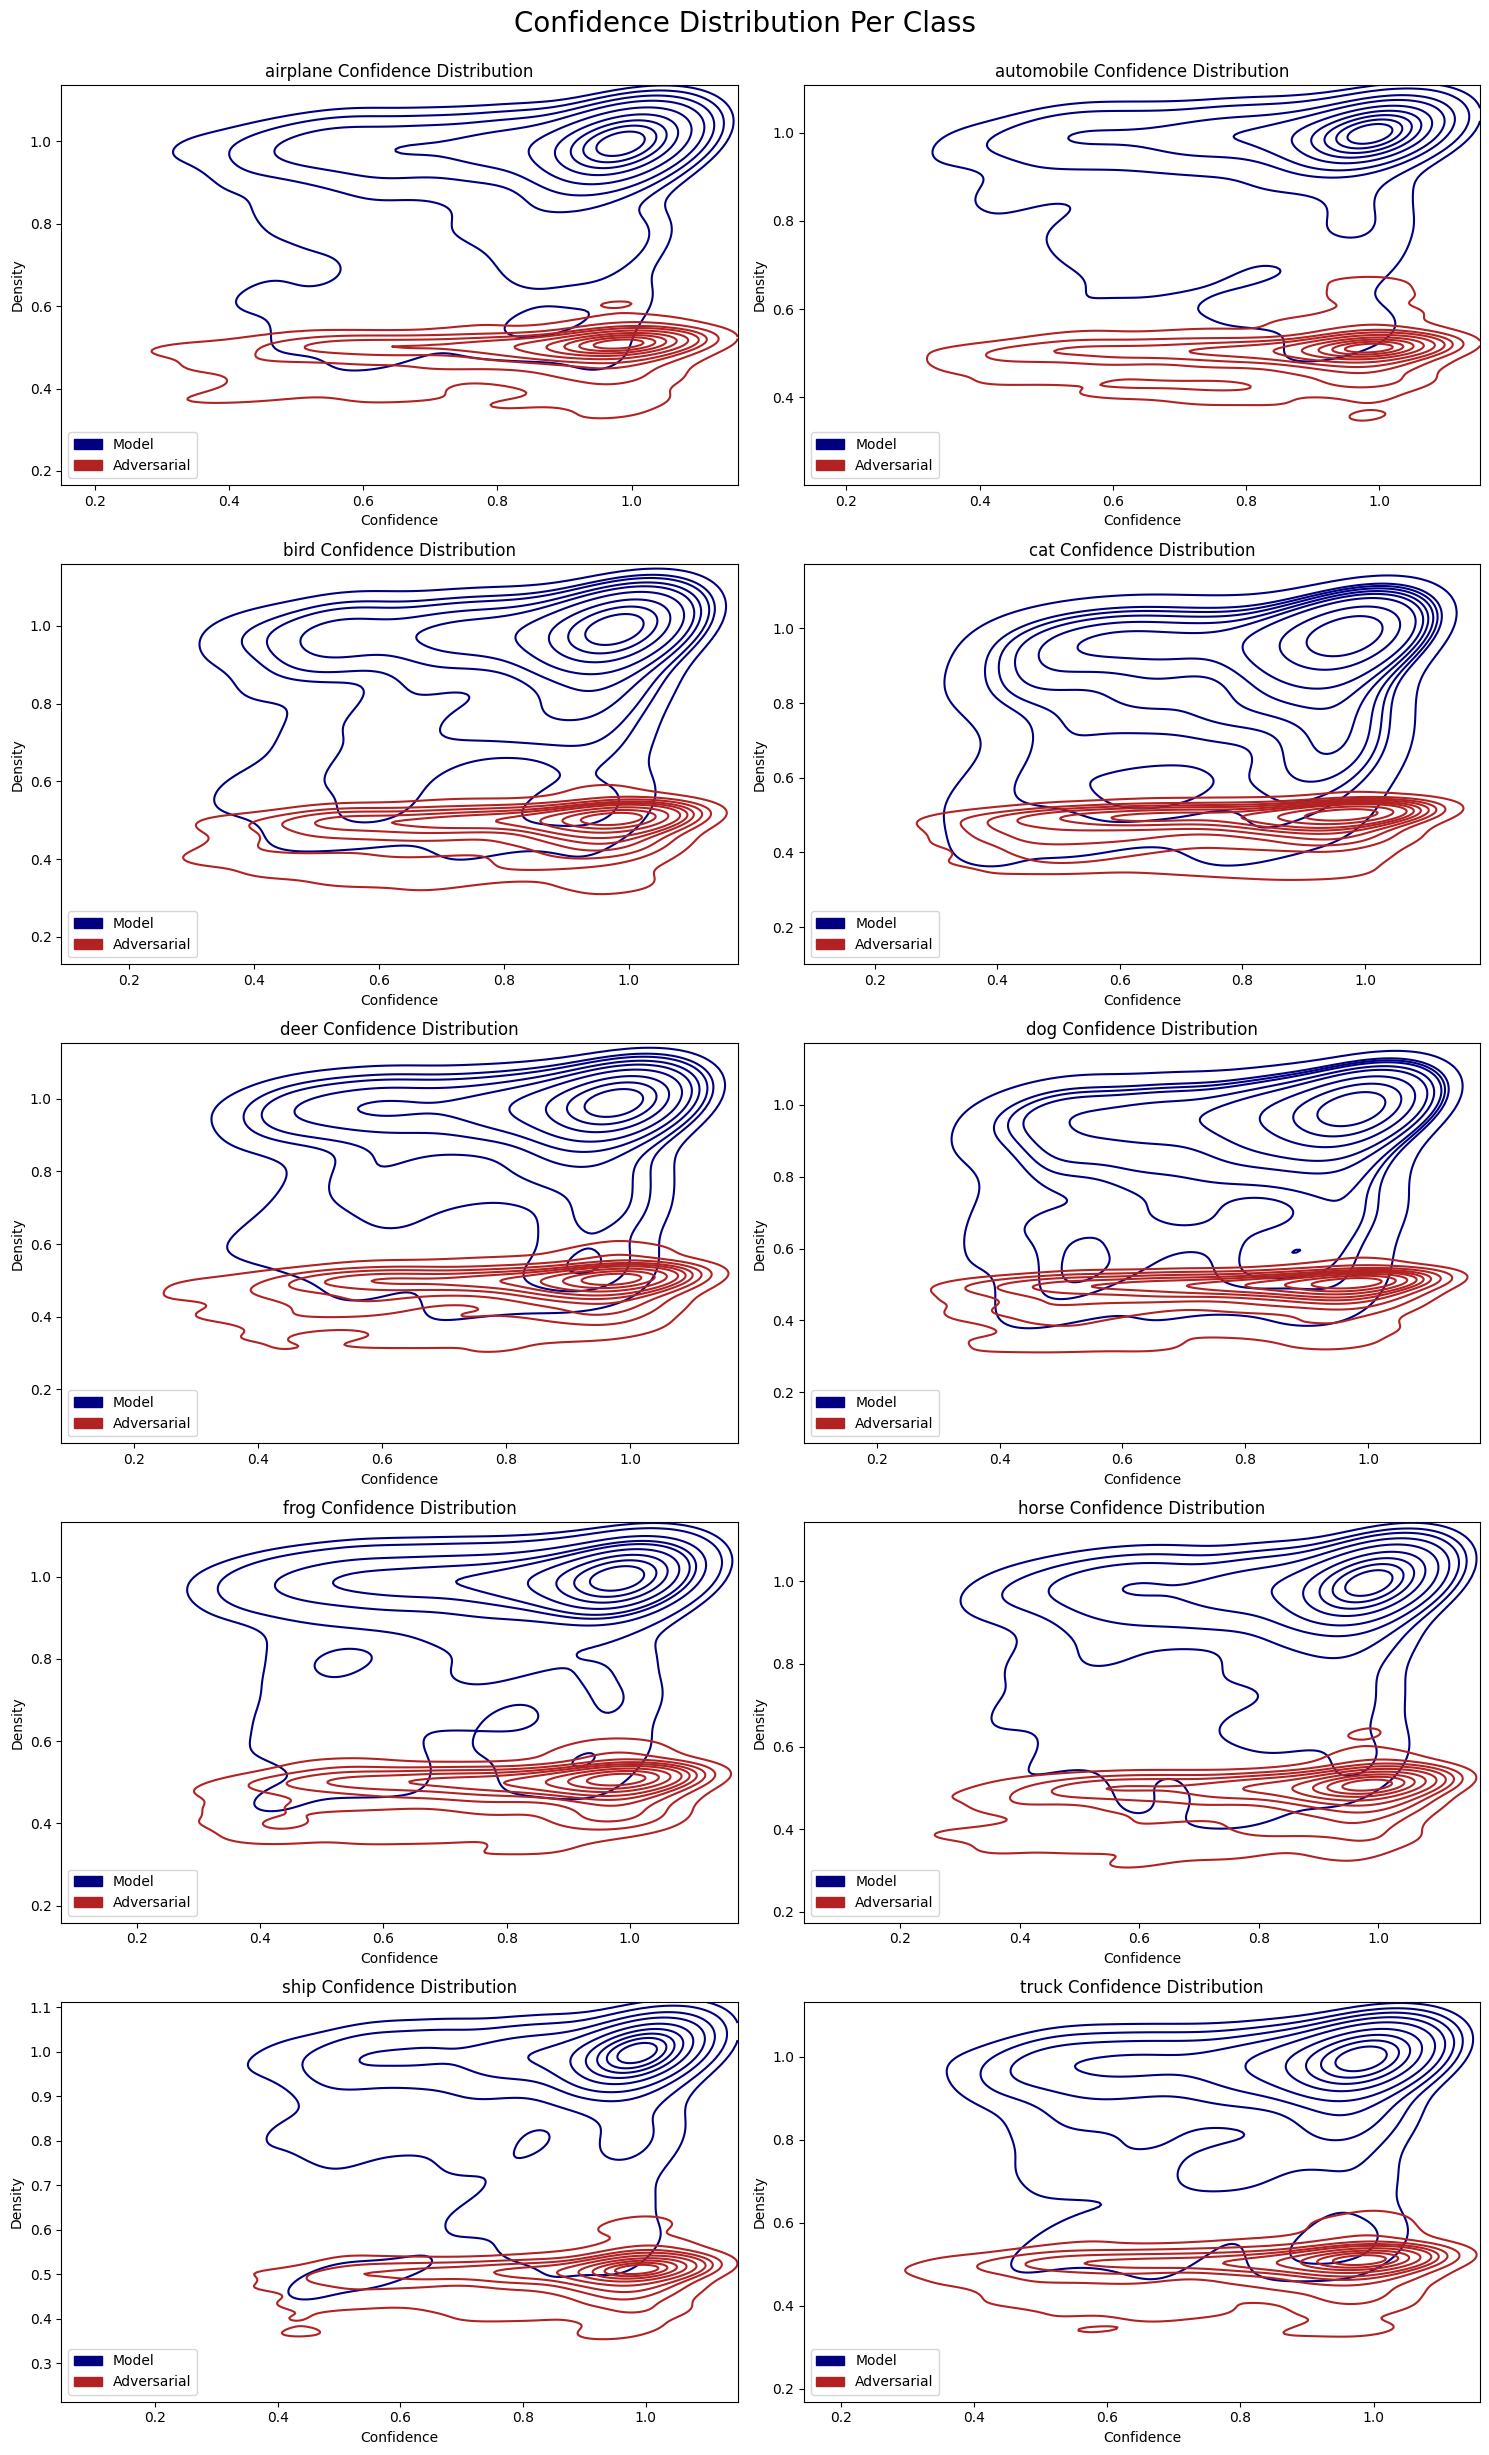

In [219]:
def plot_confidence_distribution2D(Confidences, Labels, classes):
    confidences_model = Confidences["model_confidence"]
    confidences_adversarial = Confidences["adversarial_confidence"]
    confidences_defense = Confidences["defense_confidence"]

    true_labels = Labels["true_labels"]

    
    fig, axs = plt.subplots(5, 2, figsize=(15, 25))
    
    fig.suptitle('Confidence Distribution Per Class', fontsize=20)

    for idx, class_name in enumerate(classes):
        row = idx // 2
        col = idx % 2
        # Model
        values_model = [confidences_model[i] for i, label in enumerate(true_labels) if label == idx]

        # Adversarial
        values_adversarial = [confidences_adversarial[i] for i, label in enumerate(true_labels) if label == idx]
        # Defense
        values_defense = [confidences_defense[i] for i, label in enumerate(true_labels) if label == idx]
        
        data=pd.DataFrame({"Model":values_model,"Adversarial":values_adversarial,"Defense":values_defense})

        # sns.histplot(data=data, ax=axs[row][col],stat="density", element="step",cumulative=True,fill=False)

        sns.kdeplot(data=data, y="Model", x="Defense", fill=False, levels=10,color="navy",ax=axs[row][col])
        sns.kdeplot(data=data, y="Adversarial", x="Defense", fill=False, levels=10,color="firebrick",ax=axs[row][col])

        patch1 = mpatches.Patch(color="navy", label="Model")
        patch2 = mpatches.Patch(color="firebrick", label="Adversarial")
        axs[row][col].set_title(f'{class_name} Confidence Distribution')
        axs[row][col].set_xlabel('Confidence')
        axs[row][col].set_ylabel('Density')
        axs[row][col].legend(handles=[patch1,patch2],loc="lower left")

    # Adjust layout
    plt.tight_layout()
    plt.subplots_adjust(top=0.95)
    plt.show()
plot_confidence_distribution2D(confidences,labels,classes)

In [214]:
tmp = torch.Tensor(confidences["model_confidence"])
tmp2 =  torch.Tensor(confidences["defense_confidence"])
hist=torch.histc(tmp,bins=32,min=0,max=1)
hist2 = torch.histc(tmp2,bins=32,min=0,max=1)

In [215]:
def KL_divergence(p,q):
    epsilon = 1e-10
    p += epsilon
    q +=epsilon

    p /= p.sum()
    q /= q.sum()

    return (p*(p/q).log()).sum()

In [218]:
KL_divergence(hist2,hist)

tensor(0.0918)

tensor(nan)